# Forecasting

1. Choose a **model**.
2. **Split** data into **train** and **test** sets.
3. **Fit** model on training set.
4. **Evaluate** model on test set.
5. **Refit** model on entire dataset.
6. **Forecast** on **future** data.

### Overview

1. Introduction to **Forecasting**.
2. **ACF** and **PACF** Plots
3. AutoRegression - **AR**
4. Descriptive Statistics and Tests
5. Choosing **ARIMA** orders
6. **ARIMA** based models.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Airline Passengers.csv', index_col='Month', parse_dates=['Month'])
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Train Test Split

- **Test** set will be the most **recent** dates of the data.
- The test set should be atleast as large as the maximum forecast horizon required.
- **e.g** If we want to test the forecasting for next year, test set should consist of atleast one entire year of data.
- The longer the forecast horizon, more likely prediction becomes **less accurate**.

In [3]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [4]:
train = df.iloc[:109]
test = df.iloc[108:]

We can also **split** the data according to the number of years we want to consider for **train** and **test**.

Always keep the **continuity**, otherwise you will find a **gap** between **train** and **test** set at the time of **plotting**.

In [5]:
train = df.loc[:'1957-12-01']
test = df.loc['1957-12-01':]

In [6]:
train.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1957-03-01', '1957-04-01', '1957-05-01', '1957-06-01',
               '1957-07-01', '1957-08-01', '1957-09-01', '1957-10-01',
               '1957-11-01', '1957-12-01'],
              dtype='datetime64[ns]', name='Month', length=108, freq='MS')

In [7]:
test.index

DatetimeIndex(['1957-12-01', '1958-01-01', '1958-02-01', '1958-03-01',
               '1958-04-01', '1958-05-01', '1958-06-01', '1958-07-01',
               '1958-08-01', '1958-09-01', '1958-10-01', '1958-11-01',
               '1958-12-01', '1959-01-01', '1959-02-01', '1959-03-01',
               '1959-04-01', '1959-05-01', '1959-06-01', '1959-07-01',
               '1959-08-01', '1959-09-01', '1959-10-01', '1959-11-01',
               '1959-12-01', '1960-01-01', '1960-02-01', '1960-03-01',
               '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01',
               '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01',
               '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq='MS')

Now **fit** the **model** to the **training** data.

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Lets observe that the data is linear or non linear by plotting.

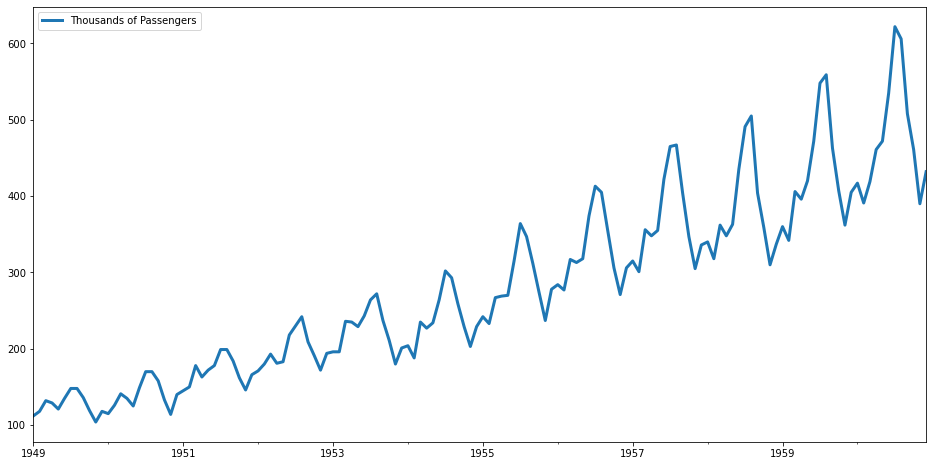

In [9]:
df.plot(figsize=(16,8), xlabel='', lw=3);

Trend is **non linear**, therefore applying **multiplicative** model.

In [10]:
model = ExponentialSmoothing(train['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Kirankumar\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Kirankumar\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Every row is equivalent to **1 month** of data. 

Forecast for 1 Year : **12**

Forecast for 2 Year : **24**

Forecast for 3 Year : **36** 

In [11]:
forecast = model.forecast(36)

C:\Users\Kirankumar\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [12]:
forecast

1958-01-01    356.968589
1958-02-01    344.588770
1958-03-01    405.718306
1958-04-01    400.610808
1958-05-01    409.001662
1958-06-01    480.694216
1958-07-01    530.470082
1958-08-01    523.288574
1958-09-01    454.210582
1958-10-01    392.518096
1958-11-01    345.928373
1958-12-01    396.605111
1959-01-01    408.958834
1959-02-01    394.775971
1959-03-01    464.808642
1959-04-01    458.957269
1959-05-01    468.570199
1959-06-01    550.704325
1959-07-01    607.729735
1959-08-01    599.502285
1959-09-01    520.363515
1959-10-01    449.685904
1959-11-01    396.310679
1959-12-01    454.368168
1960-01-01    468.521132
1960-02-01    452.272624
1960-03-01    532.505116
1960-04-01    525.801527
1960-05-01    536.814521
1960-06-01    630.910969
1960-07-01    696.241773
1960-08-01    686.816047
1960-09-01    596.151210
1960-10-01    515.179846
1960-11-01    454.030853
1960-12-01    520.544052
Freq: MS, dtype: float64

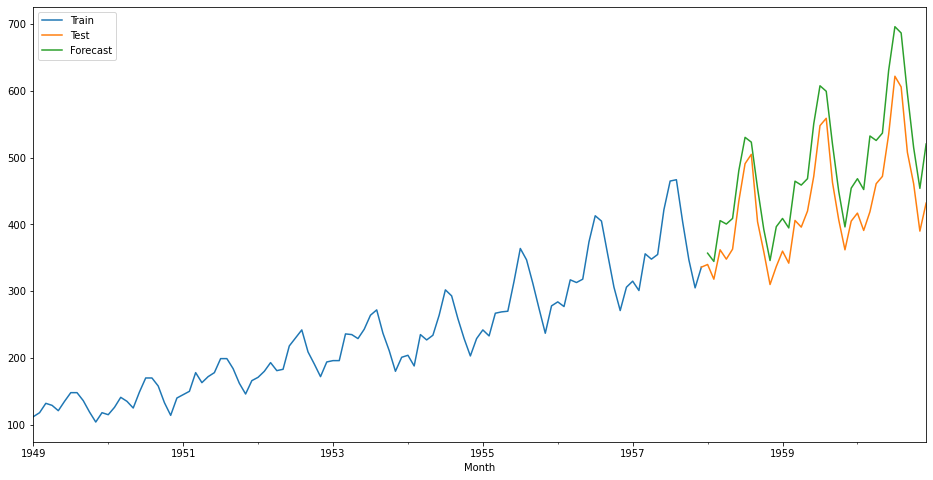

In [13]:
train['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(16,8))
test['Thousands of Passengers'].plot(legend=True, label='Test')
forecast.plot(legend=True, label='Forecast');

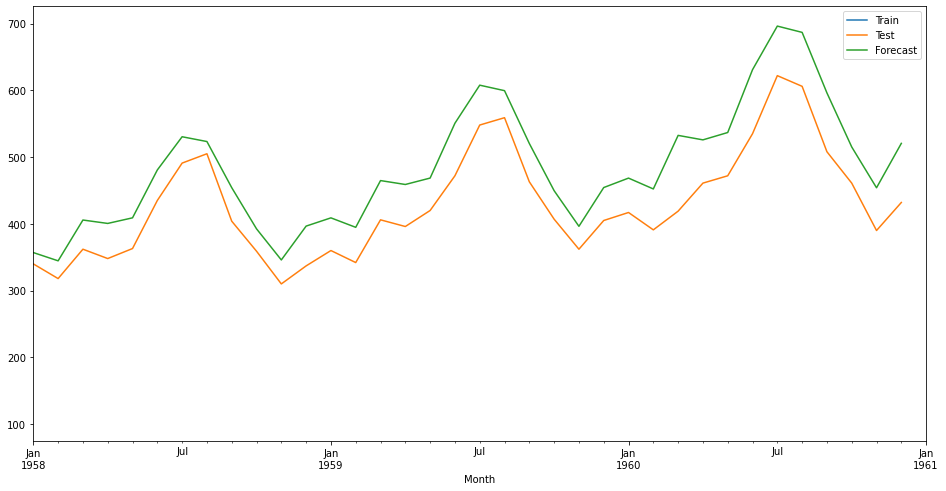

In [14]:
train['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(16,8))
test['Thousands of Passengers'].plot(legend=True, label='Test')
forecast.plot(legend=True, label='Forecast', xlim=['1958-01-01', '1961-01-01']);